# Human Factors Prediction Model => LSTM(NTSB)

## Import Notebook

In [6]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

In [8]:
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
# ntsb_df.sort_values(by='date', ascending=False, inplace=True)
# ntsb_df = ntsb_df.sample(n=1000, random_state=42)

ls_version = 2 # Default version=2
ls_name = 'asrs_ntsb'
ds_name='ntsb'

In [ ]:
def call_modal(options):
    dfs = { ds_name: df.copy() }
    model = LSTMModel(dfs, ds_name=ds_name, options=options)
    model.train()

    # 03. Evaluate Model
    evaluate_result = model.evaluate()
    return model

## LSTM(NTSB) + LS(Asrs)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


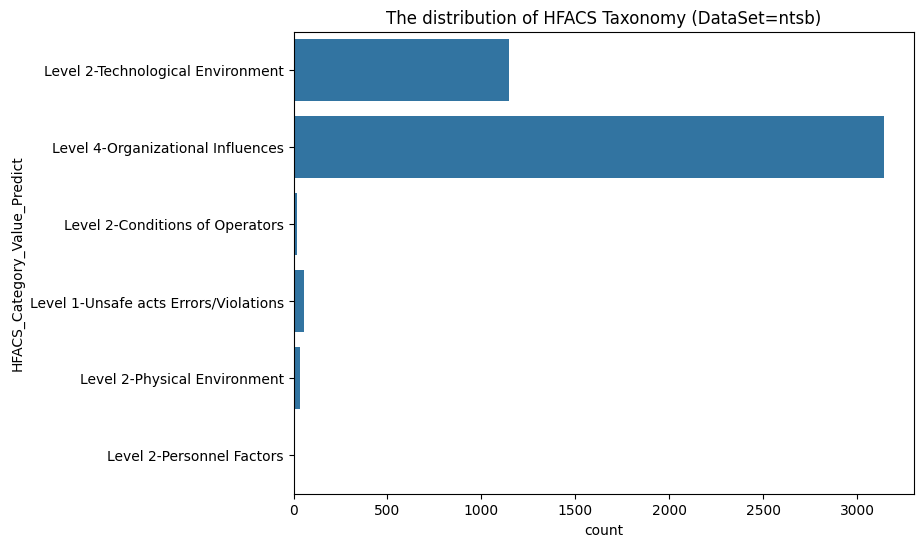

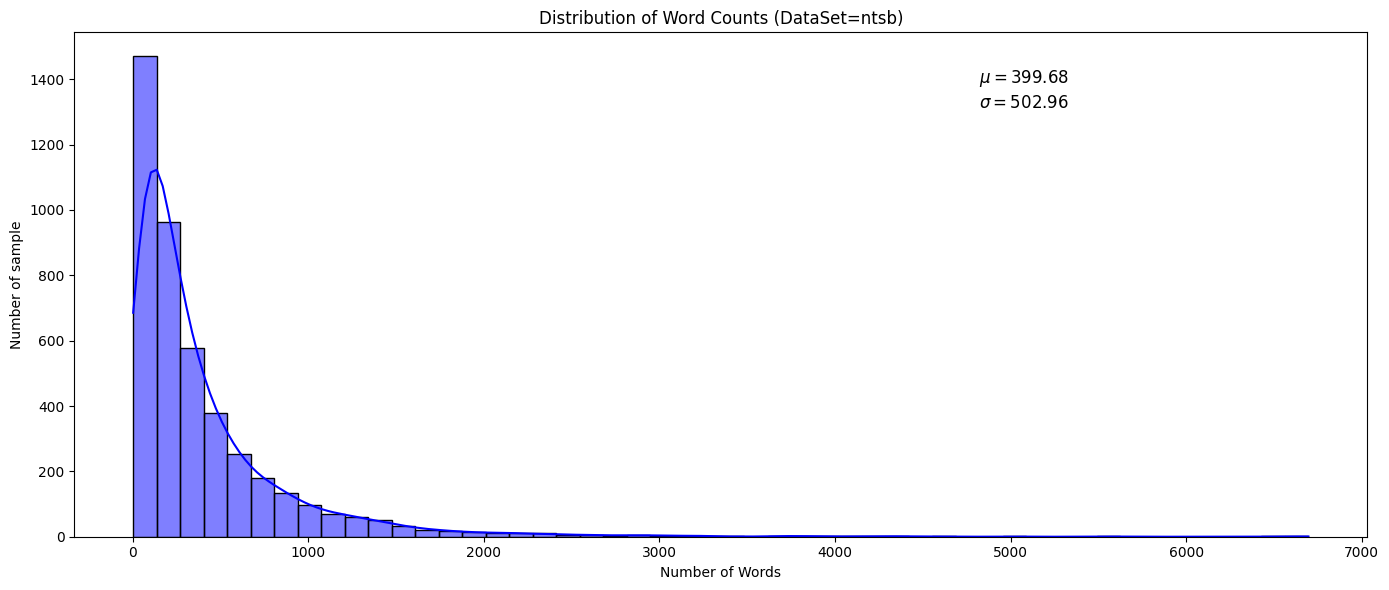

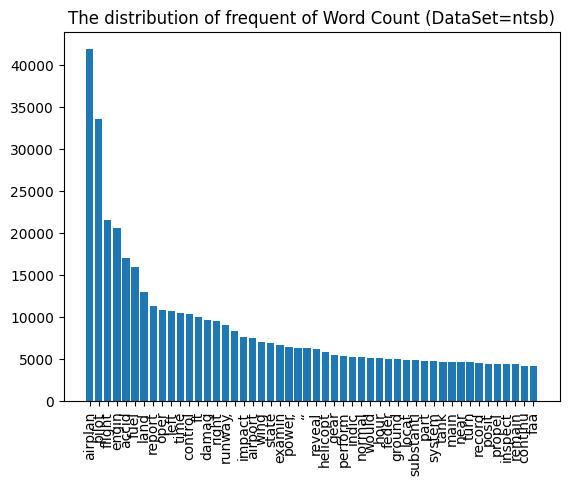

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
5    633
4    224
0     13
3      5
1      4
Name: count, dtype: int64
5    2510
4     921
0      40
3      28
1      15
2       2
Name: count, dtype: int64
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.6009 - loss: 1.6961 - val_accuracy: 0.7102 - val_loss: 0.7784
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.7269 - loss: 0.7212 - val_accuracy: 0.7102 - val_loss: 0.7056
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.7079 - loss: 0.7165 - val_accuracy: 0.7102 - val_loss: 0.6772
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.7117 - loss: 0.6761 - val_accuracy: 0.7358 - val_loss: 0.6293
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.7499 - loss: 0.6320 - val_accuracy: 0.7699 - val_loss: 0.5946
Epoch 6/10
99/99 ━━━━━━━

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_class

138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step


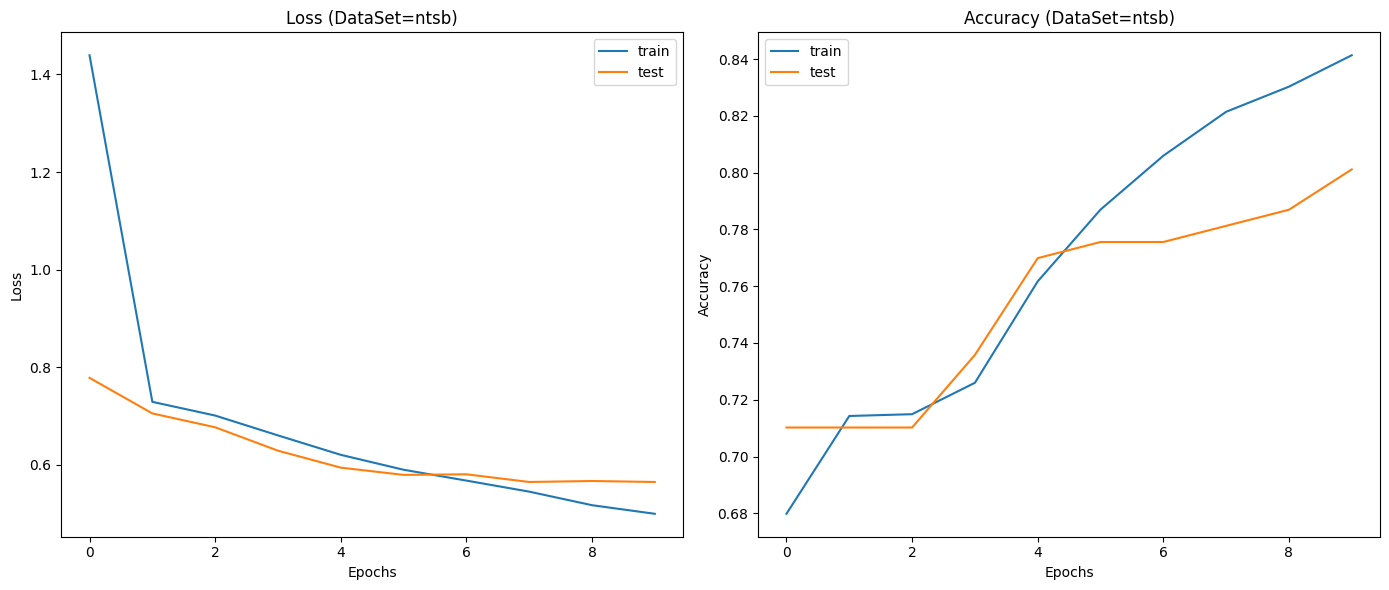

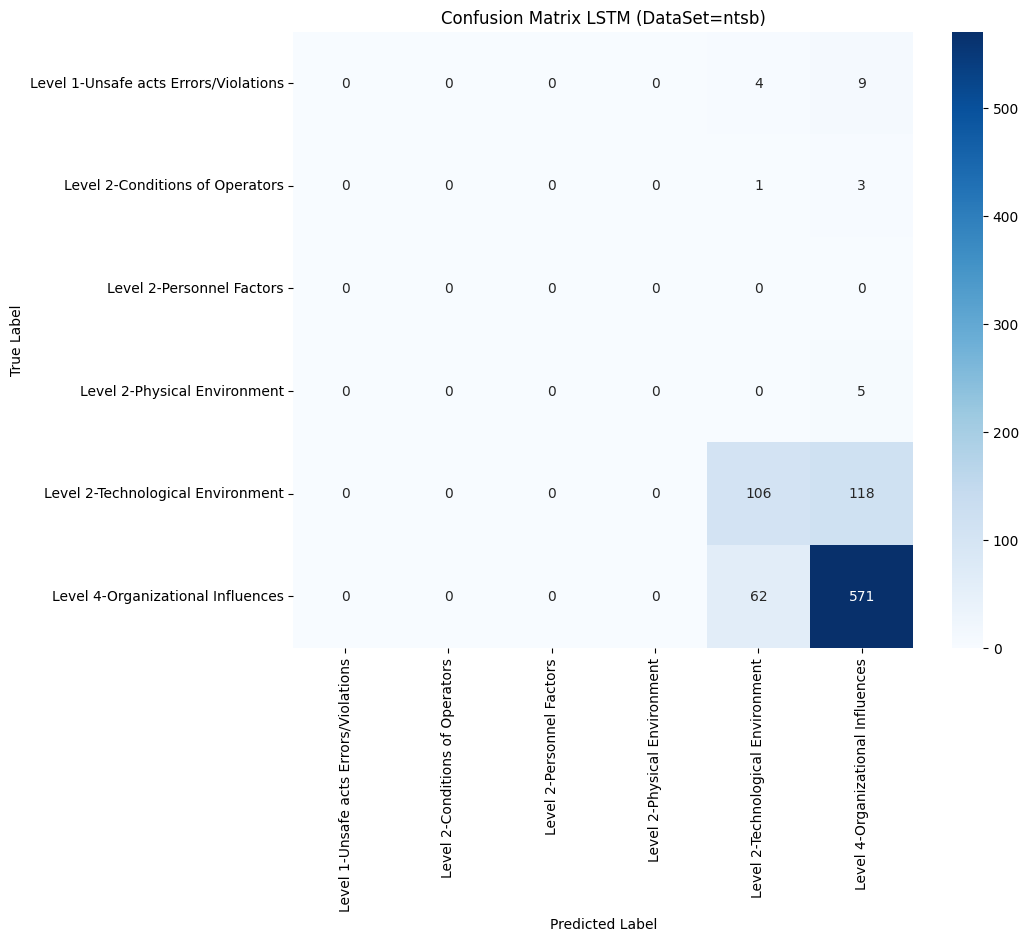

In [9]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 04. Train Model
lstm_model = call_modal(options)

## LSTM(NTSB) + LS(Hybrid) + Class Weight

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


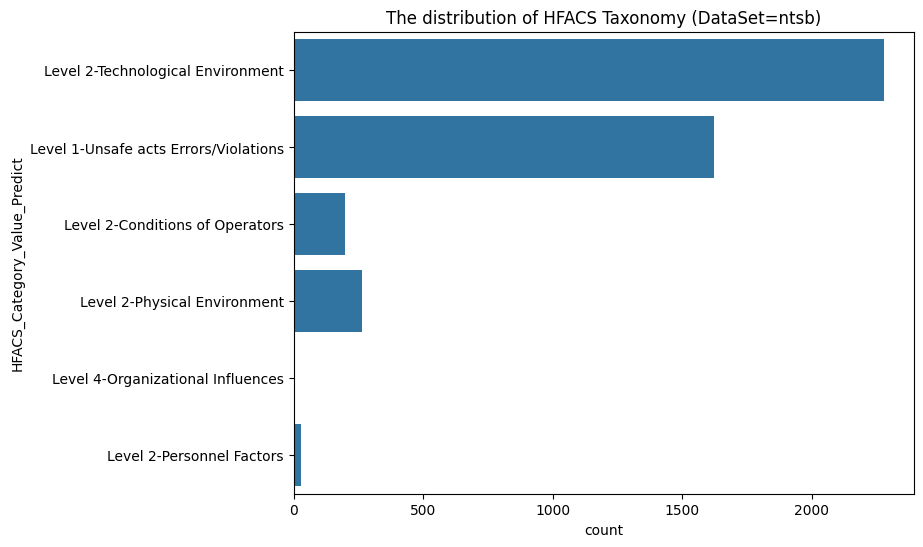

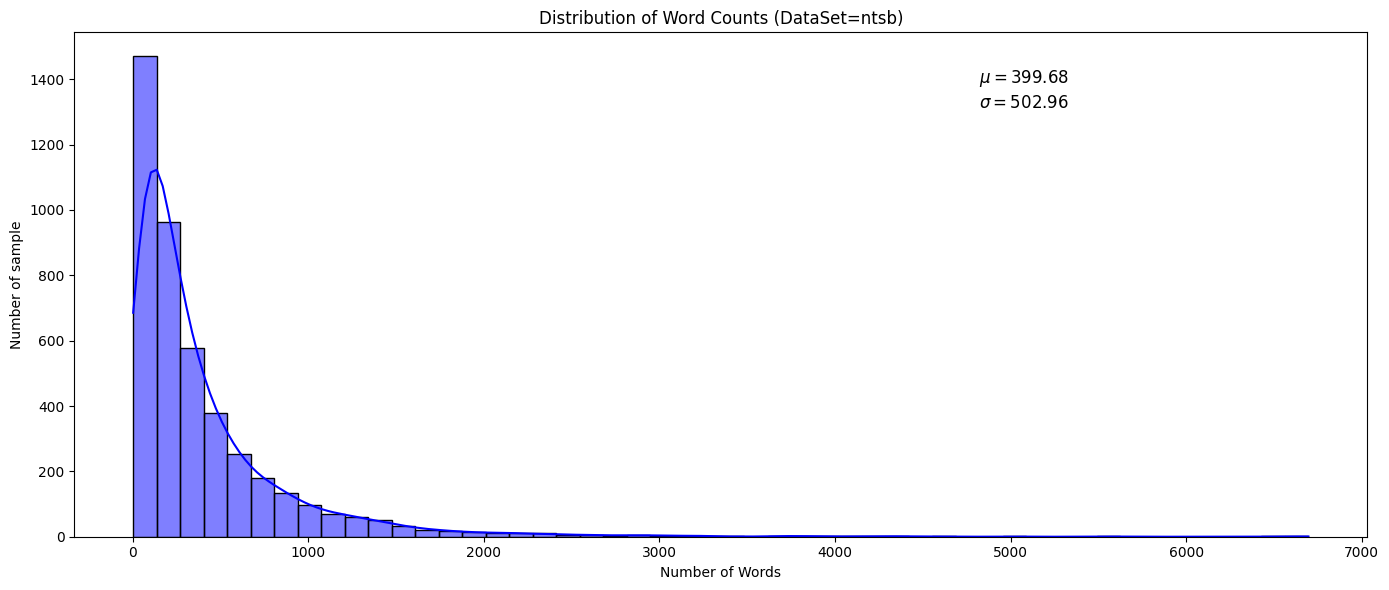

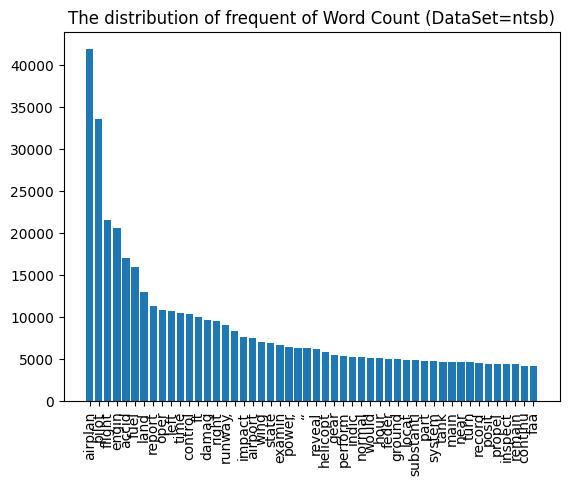

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
4    476
0    303
3     51
1     44
2      5
Name: count, dtype: int64
4    1802
0    1319
3     215
1     154
2      23
5       3
Name: count, dtype: int64
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.4370 - loss: 1.7339 - val_accuracy: 0.5028 - val_loss: 1.1033
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.5172 - loss: 1.1099 - val_accuracy: 0.5028 - val_loss: 1.0602
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.5031 - loss: 1.0995 - val_accuracy: 0.5028 - val_loss: 1.0519
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.5003 - loss: 1.0598 - val_accuracy: 0.5028 - val_loss: 1.0391
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.5289 - loss: 1.0476 - val_accuracy: 0.5028 - val_loss: 1.0101
Epoch 6/10
99/99 ━━━━━━━

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_class

138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


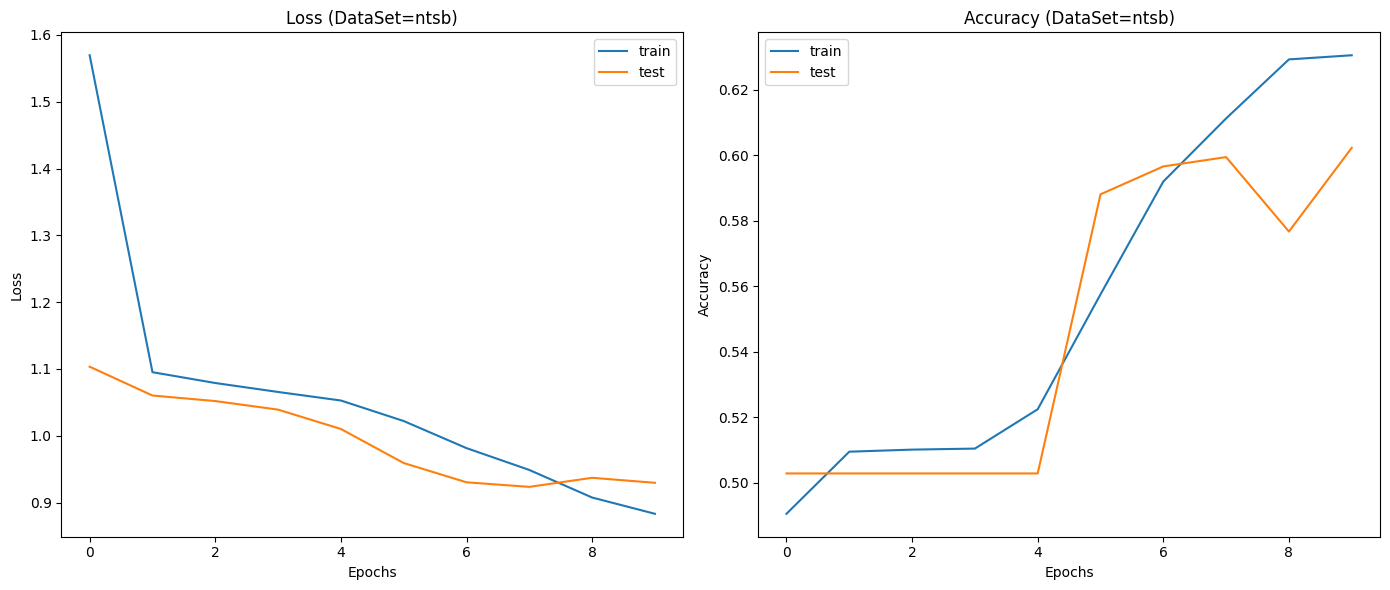

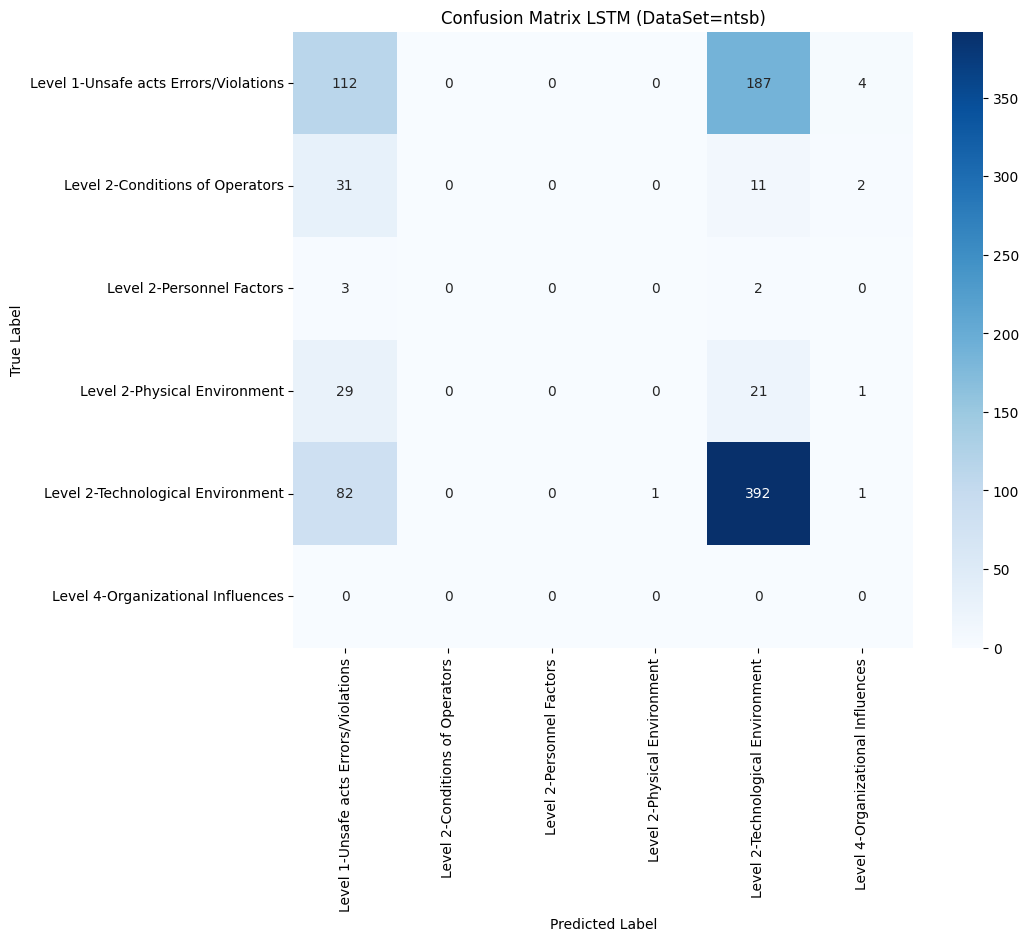

In [10]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": True,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 04. Train Model
lstm_model_weight = call_modal(options)

## LSTM(NTSB) + LS(Hybrid) + SMOTE

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


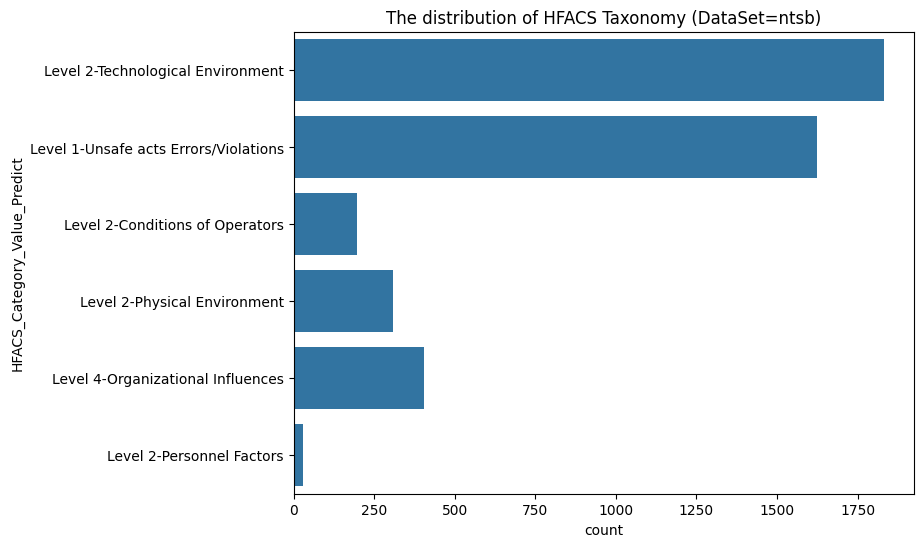

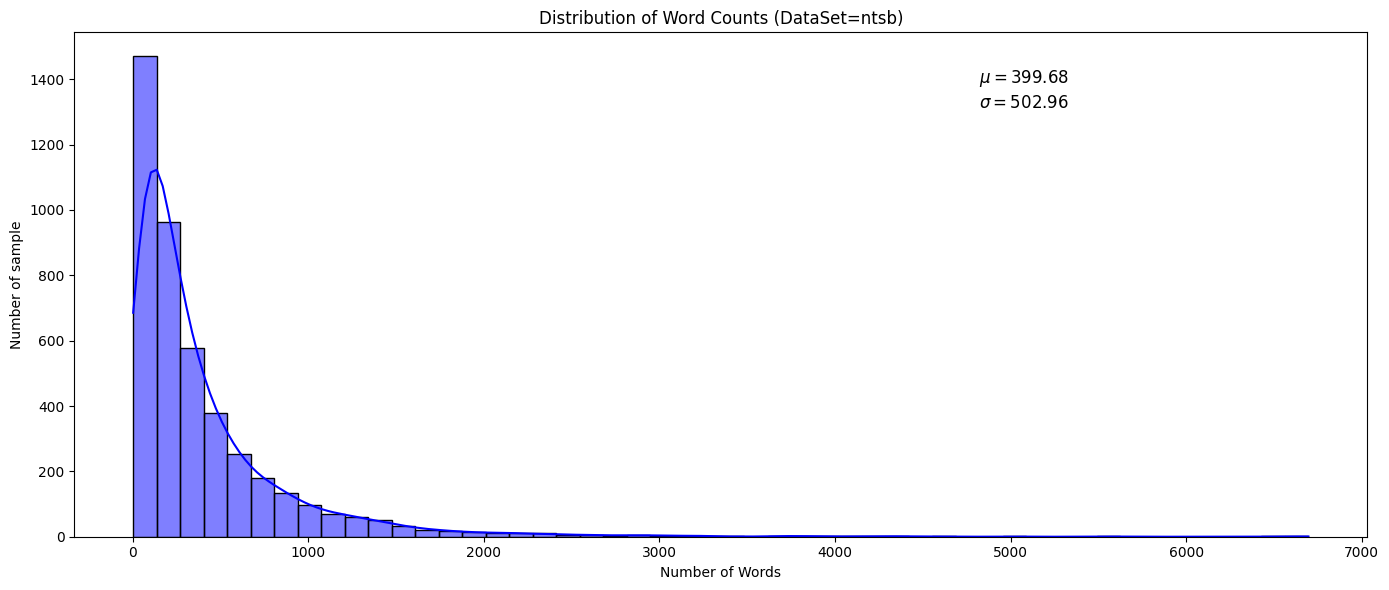

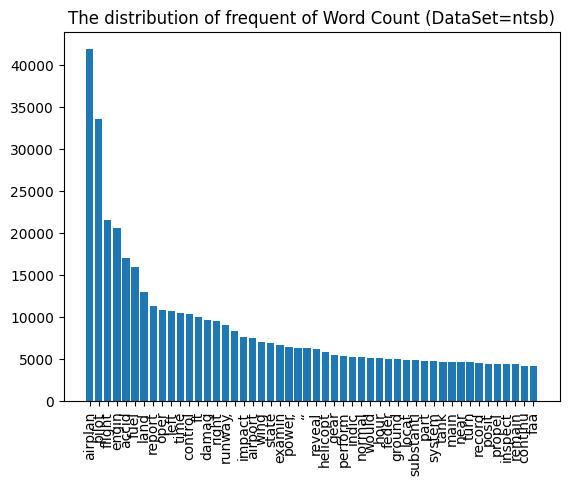

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3516, 200) (3516,)
(879, 200) (879,)
4    368
0    303
5    101
3     58
1     44
2      5
Name: count, dtype: int64
4    1464
0    1320
5     304
3     251
1     154
2      23
Name: count, dtype: int64
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.3631 - loss: 1.7438 - val_accuracy: 0.4119 - val_loss: 1.3168
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.4044 - loss: 1.3291 - val_accuracy: 0.4119 - val_loss: 1.2874
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.4008 - loss: 1.3340 - val_accuracy: 0.4119 - val_loss: 1.2833
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.4098 - loss: 1.3336 - val_accuracy: 0.4119 - val_loss: 1.2751
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.4405 - loss: 1.2916 - val_accuracy: 0.4688 - val_loss: 1.2471
Epoch 6/10
99/9

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step


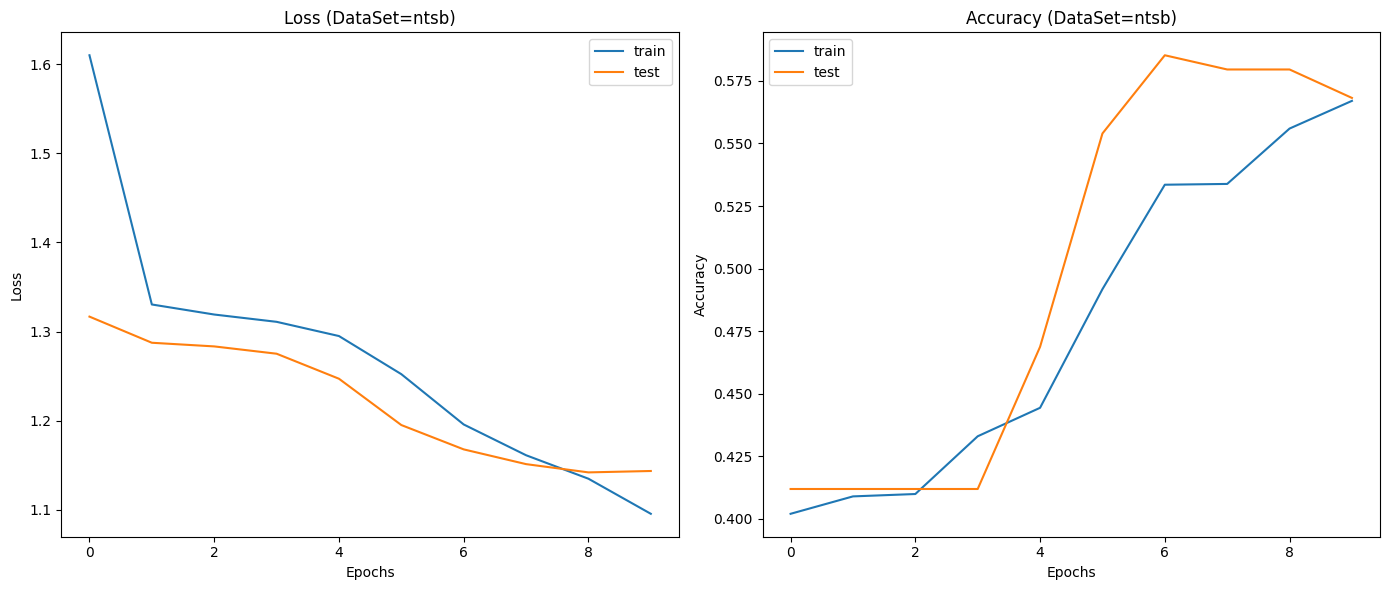

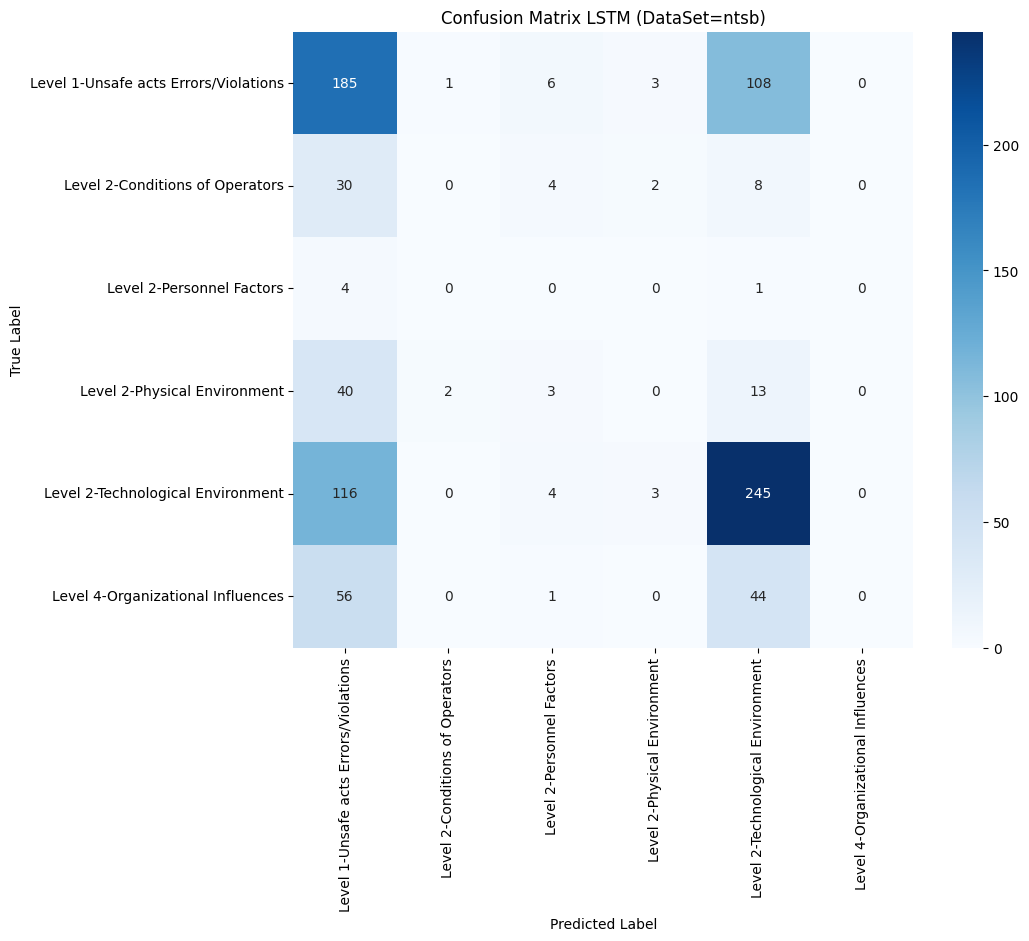

In [11]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": True,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 04. Train Model
lstm_model_smote = call_modal(options)

## LSTM(NTSB) + LS(Hybrid) + ASASYN

In [ ]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": True,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 04. Train Model
lstm_model_asasyn = call_modal(options)

## Summary of Accuracy

In [12]:
# Show Accuracy
print('ASRS+LS(Hybrid)=========')
show_accuracy(lstm_model)
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_accuracy(lstm_model_weight)
print('ASRS+LS(Hybrid)+SMOTE=========')
show_accuracy(lstm_model_smote)
print('ASRS+LS(Hybrid)+ASAYN=========')
show_accuracy(lstm_model_asasyn)

ASRS=========
Accuracy: 77.02
Micro F1 Score: 77.02
Macro F1 Score: 27.74
Weighted F1 Score: 75.03
Hamming Loss: 0.2298
NTSB=========
Accuracy: 57.34
Micro F1 Score: 57.34
Macro F1 Score: 18.67
Weighted F1 Score: 52.77
Hamming Loss: 0.4266
ASRS_NTSB=========
Accuracy: 48.92
Micro F1 Score: 48.92
Macro F1 Score: 18.78
Weighted F1 Score: 43.44
Hamming Loss: 0.5108
